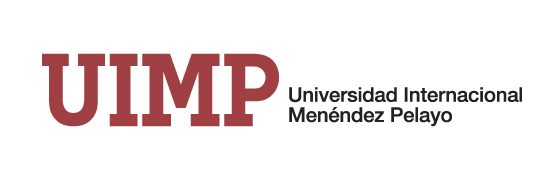

<div class="alert alert-block alert-info"><font size="5"><center><b><u>Adrià Nova Pagés</u></b></center></font>

# <span style=color:darkblue> Datos de Ahogamiento con Datos Meteorológicos - Machine Learning</span>

In [2]:
# Librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc

In [3]:
# Cargamos los datos
pd.set_option('display.max_columns', None)
datos_ahogamientos = pd.read_csv("datos_ahogamiento_meteorologicos.csv")

In [60]:
# Crear variable si se ha producido un ahogamiento mortal o no
#datos_ahogamientos["AhogamientoMortal"] = np.where(datos_ahogamientos["Pronostico"] == "Ahogamiento mortal", 1, 0)

Para aplicar técnicas de clustering a estos datos de ahogamientos en España, primero debes seleccionar las características relevantes y preparar los datos para el análisis. Aquí hay algunos pasos que puedes seguir:

Selecciona las características relevantes: Revisa las columnas disponibles en tus datos y selecciona las que consideres relevantes para el análisis de clustering. Por ejemplo, podrías considerar la ubicación geográfica (latitud y longitud), fecha, edad, sexo, provincia, causa del ahogamiento, tipo de ahogamiento, etc. Selecciona las características que te parezcan más adecuadas para agrupar los casos de ahogamiento.

Limpia los datos: Revisa si hay datos faltantes, duplicados o inconsistencias en tus datos y trata de resolverlos. Por ejemplo, si tienes valores faltantes en la columna de edad, puedes optar por eliminar esas filas o imputar valores utilizando técnicas como el valor medio o la mediana. Asegúrate de que tus datos estén limpios y listos para el análisis.

Codifica las variables categóricas: Si tienes variables categóricas en tus datos, como el sexo o la provincia, deberás codificarlas numéricamente para que los algoritmos de clustering puedan trabajar con ellas. Puedes utilizar técnicas como la codificación one-hot o asignar valores numéricos a cada categoría.

Normaliza las características: Es posible que las características tengan diferentes escalas, por lo que es recomendable normalizar los datos antes de aplicar técnicas de clustering. Puedes utilizar técnicas como la estandarización (por ejemplo, escalar las características para que tengan media cero y desviación estándar uno) para asegurarte de que todas las características contribuyan de manera equitativa al análisis.

Aplica técnicas de clustering: Una vez que hayas preparado los datos, puedes aplicar algoritmos de clustering como k-means, DBSCAN o jerárquico para agrupar los casos de ahogamiento. Estos algoritmos buscarán patrones y similitudes entre los datos para formar grupos coherentes. Puedes experimentar con diferentes algoritmos y parámetros para obtener los resultados deseados.

Evalúa los resultados: Después de aplicar el algoritmo de clustering, es importante evaluar los resultados. Puedes analizar las características de cada grupo y tratar de interpretar qué significan. También puedes visualizar los resultados utilizando técnicas como gráficos de dispersión o t-SNE para ver la distribución de los casos en función de las características seleccionadas.

Recuerda que el éxito de las técnicas de clustering depende en gran medida de la calidad de los datos y de la selección adecuada de características. Además, el análisis de clustering es un proceso iterativo, por lo que puedes ajustar y refinar tus pasos según los resultados y las interpretaciones obtenidas.

## <span style=color:darkblue> Machine Learning - Técnicas de clustering y APRIORI</span>

In [57]:
# PREPARAR LOS DATOS
drop_columns = ["IdAhogado", "IdPersona", "Localidad", "Provincia", "CCAA", "Origen", \
           "Titular", "Causa", "Factor", "Enlace1", "Indicador", "Estacion"]
datos_ahogamientos_filter = datos_ahogamientos.drop(drop_columns, axis = 1)
datos_ahogamientos_filter.head()

,Fecha,Hora,Latitud,Longitud,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Intervencion,Pronostico,Localizacion,Riesgo,Reanimacion,Vigilancia,Actividad,Deteccion,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
0,30-12-2020,NaN,41.130523,1.395311,Sin Datos,NaN,España,Embarcación de rescate,Posible Ahogamiento,Recuperación de cadaver,Ahogamiento mortal,Franja costera o alta mar,Sin datos,Recuperacion de cadaver,No vigilado,Sin datos,Ciudadano,50,10.0,0.0,8.0,12.1,30.0,4.4,22.8,3.9,1010.0,1000.9
1,29-12-2020,17:48,36.519991,-6.287258,Sin Datos,NaN,España,Ciudadano,Posible Ahogamiento,Recuperación de cadaver,Ahogamiento no mortal con hospitalizacion,Playas sin vigilancia,Sin datos,SVA por SEM,No vigilado,Natación recreativa,Ciudadano,2,12.2,0.2,9.2,15.3,32.0,3.3,9.4,NaN,1017.0,1011.4
2,29-12-2020,02:30,43.317215,-1.977996,Hombre,47.0,España,Cuerpo de Seguridad o Emergencias,Ahogamiento secundario a accidente,Recuperación de cadaver,Ahogamiento mortal,"Puertos, embarcaderos, amarres",Malas condiciones meterológicas o del agua (Ba...,Recuperacion de cadaver,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
3,29-12-2020,02:30,43.317215,-1.977996,Hombre,33.0,España,No preciso extraccion,Perdida de Control,Recuperación de cadaver,Rescate y traslado a supervisión médica,"Puertos, embarcaderos, amarres",Malas condiciones meterológicas o del agua (Ba...,Sin Reanimacion,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
4,28-12-2020,07:30,29.225448,-13.502007,Hombre,NaN,España,Embarcacion costera,Perdida de Control,Asistencia por transeúntes adiestrados,Rescate sin consecuencias,Franja costera o alta mar,Sin datos,Sin Reanimacion,No vigilado,Embarcación a motor,"Acompañante, familiar, amigo",24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5


In [61]:
datos_ahogamientos_filter.isna().sum()

Fecha                 0
Hora               1436
Latitud               0
Longitud              0
Sexo                  0
Edad               1579
Nacionalidad          0
Extraccion            0
TipoAhogamiento       0
Intervencion          0
Pronostico            0
Localizacion          0
Riesgo                0
Reanimacion           0
Vigilancia            0
Actividad             0
Deteccion             0
Altitud               0
TempMed              34
Precip              371
TempMin              34
TempMax              29
DirViento           183
VelMedViento        161
RachaViento         183
TiempoSol           617
PresionMax           57
PresionMin           56
dtype: int64

**CODIFICACIÓN DE VARIABLES CATEGORICAS**

- **Sexo:** Si es un hombre 1 si es mujer 0
- **Edad:** Reemplazamos el "70.0" a "70" con un replace
- **Nacionalidad:** Como 6602/8015 son de origen español,  1 si es español 0 extranjero
- **Origen:** (valores entre 1 - 6, dependiendo de la categoria) || 3.500 sin datos

    - Sin datos         -
    - Local             1
    - Extranjero        2
    - Limítrofe         3
    - Otra CCAA         4
    - Residente         5
    - Otra provincia    6

- **Extraccion** (valores entre 1 - 5, dependiendo de la categoria):  || 106 sin datos

    - Cuerpo de Seguridad o Emergencias    1
    - Socorrista                           2
    - Ciudadano                            3
    - Acompañante, familiar, amigo         3
    - Embarcación de rescate               1
    - Helicoptero                          1
    - Fuerzas orden publico                1
    - Embarcacion costera                  1
    - No preciso extraccion                4
    - Sin datos                            -
    - Embarcación de recreo                1
    - Socorrista con material              2
    - Moto acuática de rescate             2
    - Otros                                5
    - Tabla de rescate                     2

    
- **Causa:** (valores entre 1 - 18, dependiendo de la categoria): || 2.252 sin datos

    - Sin datos                                     -
    - Condiciones del medio acuático                1
    - Accidente, caída o zambullida accidentales    2
    - Naufragio                                     3
    - Riadas, desbordamientos, inundaciones         4
    - Enfermedad, ataque cardíaco o ACVA            5
    - Corriente de resaca                           6
    - Incidente o accidente de buceo                7
    - Accidente de Trafico                          8
    - Navegación o deportes acuáticos               9
    - Intento de rescate de personas o animales     10
    - Suicidio                                      11
    - Falta de competencia acuática                 12
    - Falta de supervisión o vigilancia             13
    - Excesiva confianza o asunción de riesgo       14
    - Drogas, alcohol, otros tóxicos                15
    - Otros                                         16
    - Homicidio, Asesinato                          17
    - Atrapamiento                                  18
    
    
- **TipoAhogamiento**(valores entre 1 - 11, dependiendo de la categoria): || 24 sin datos

    - Perdida de Control                            1
    - Ahogado con sintomas de aspiración de agua    2
    - Posible Ahogamiento                           3
    - Ahogamiento secundario a accidente            4
    - Victima con traumatismo                       5
    - Ahogamiento secundario a enfermedad           6
    - Victima sin sintomas de ahogamiento           7
    - Distres Acuatico                              8
    - Ahogado sin sintomas de aspiración de agua    9
    - Sin datos                                     -
    - Muerte previa a inmersion                     10
    - Ahogado por hidrocucion                       11
    
    
- **Factor**(valores entre 1 - 11, dependiendo de la categoria): || 4.700 sin datos

    - Sin datos                                   -
    - Edad, Enfermedad, Enfermedad Mental         1
    - Peligrosidad del entorno                    2 
    - Navegación, deportes acuáticos              3
    - Violación de normas de seguridad            4
    - Falta de supervisión o vigilancia           5
    - Drogas, Alcohol, tóxicos                    6
    - Falta de protección o equipamiento          7
    - Intento de Rescate acuático                 8
    - Externos al medio acuático                  9
    - Desconocimiento o falta de información      10
    - Psicológicos, roles de grupo                11
    
    
- **Intervención**(valores entre 1 - 8, dependiendo de la categoria): || 78 sin datos

    - Rescate por Socorristas o personas adiestradas en RCP                  1
    - Rescate por personal adiestrado con equipamiento                       2
    - Asistencia por transeúntes no adiestrados                              3
    - Recuperación de cadaver                                                4
    - Asistencia por transeúntes adiestrados                                 5
    - Rescate por personal adiestrado con soporte de emergencias             6
    - Sin datos                                                              -
    - Rescate y atención in situ por personal de salvamento y emergencias    7
    - Rescate y atención médica completa                                     8


- **Pronóstico**(valores entre 1 - 8, dependiendo de la categoria): || 21 sin datos

    - Ahogamiento mortal                                1
    - Rescate sin consecuencias                         2
    - Ahogamiento no mortal con hospitalizacion         3
    - Rescate y traslado a supervisión médica           4
    - Lesiones                                          5
    - Traumatismo/TRM                                   6
    - Rescate con necesidad de observación posterior    7
    - Fallecimiento Sin Ahogamiento                     8
    - Sin datos                                         -
    
- **Localización** (valores entre 1 - 19, dependiendo de la categoria): || 0 sin datos

    - Playas con vigilancia                                        1
    - Playas sin vigilancia                                        2
    - Rios, canales y similares                                    3
    - Entorno marino                                               4
    - Franja costera o alta mar                                    5
    - Piscinas domesticas no vigiladas                             6
    - Puertos, embarcaderos, amarres                               7
    - Otros                                                        8
    - Embalses, Pantanos                                           9
    - Piscinas publicas con vigilancia                             10
    - Sistemas de recogida, transporte o almacenamiento de agua    11
    - Piscinas de equipamientos hoteleros y similares              12
    - Piscinas urbanización o privadas no vigiladas                13
    - Piscinas de urbanizaciones con vigilancia                    14
    - Aguas interiores sin vigilancia                              15
    - Contenedor de agua, cubo, fuente, etc                        16
    - Parque acuatico                                              17
    - Bañera                                                       18
    - Aguas interiores con vigilancia                              19


- **Riesgo** (valores entre 1 - 3, dependiendo de la categoria): || 4.500 sin datos

    - Sin datos                                                             -
    - Malas condiciones meterológicas o del agua (Bandera Roja)             1
    - Buenas condiciones metereológicas o del agua (Bandera Verde)          2
    - Moderadas condiciones metereológicas o del agua (Bandera amarilla)    3
    


- **Reanimación** (valores entre 1 - 11, dependiendo de la categoria): || 227 sin datos


   - Sin Reanimacion                                       1
   - Recuperacion de cadaver                               2
   - RCP basica SOS y SVA por SEM                          3
   - SVA por SEM                                           4
   - Sin datos                                             -
   - RCP basica temprana por transeunte adiestrado         5
   - RCP temprana por transeuntes no adiestrados           6
   - No RCP temprana y SVA por SEM                         7
   - RCP basica por socorrista en servicio                 8
   - SVB personal emergencias (policia, bomberos, etc.)    9
   - RCP basica por Socorrista no en servicio              10
   - Asistencia hospitalaria                               11
    
- **Vigilancia** (valores entre 1 - 3, dependiendo de la categoria): || 27 sin datos

    - No vigilado                        1
    - En horario de vigilancia           2
    - Fuera del horario de vigilancia    3
    - Sin datos                          -
    
- **Actividad** (valores entre 1 - 26, dependiendo de la categoria): || 333 sin datos

    - Natación recreativa                   1
    - Actividad cerca del agua              2
    - Circulación en vehiculo               3
    - Embarcación a motor                   4
    - Sin datos                             -
    - Pesca desde playa o rocas             5
    - Surf-Windsurf-Esqui acuatico-Kyte     6
    - Piraguismo, Kayac                     7
    - Embarcación de vela                   8
    - Pesca o navegación comercial          9
    - Buceo recreativo con botella          10
    - Buceo a pulmon                        11
    - Zambullida                            12
    - Juegos en el agua                     13
    - Pesca recreativa desde embarcacion    14
    - Intento de rescate acuatico           15
    - Barranquismo                          16
    - Otro                                  17
    - Natación competitiva                  18
    - Parapente, vuelo                      19
    - Buceo profesional                     20
    - Actividad acuatica organizada         21
    - Baño en reposo                        22
    - Paseo en tierra                       23
    - Transporte no acuático                24
    - Transporte acuático                   25
    - Actividad sobre hielo                 26
    
    
- **Detección** (valores entre 1 - 3, dependiendo de la categoria): || 137 sin datos

    - Ciudadano                                     1
    - Acompañante, familiar, amigo                  2
    - Socorrista en servicio                        3
    - Servicios de emergencia, policia, bomberos    4
    - Sin datos                                     -
    - Socorrista no en servicio                     5
    - Otro                                          6
    - Personal instalacion                          7


## K-MEANS CLUSTERING

https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/ - kmeans

https://realpython.com/k-means-clustering-python/

https://towardsdatascience.com/how-to-perform-kmeans-clustering-using-python-7cc296cec092

In [90]:
# Cargamos los datos con variables categorizadas
pd.set_option('display.max_columns', None)
datos_ahogamientos_descategorizados = pd.read_csv("datos-ahogamiento-meteorologicos_descategorizados.csv")
datos_ahogamientos_descategorizados.head(2)

,Fecha,IdAhogado,IdPersona,Localidad,Provincia,CCAA,Hora,Latitud,Longitud,Sexo,Edad,Nacionalidad,Origen,Extraccion,Titular,Causa,TipoAhogamiento,Factor,Intervencion,Pronostico,Localizacion,Riesgo,Reanimacion,Vigilancia,Actividad,Deteccion,Enlace1,Indicador,Estacion,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
0,30-12-2020,7432,8532,Torredembarra,Tarragona,Cataluña,NaN,41.130523,1.395311,Sin datos,NaN,1,Sin datos,1,Encuentran un cadáver flotando en el mar cerca...,Sin datos,3,Sin datos,4,1,5,Sin datos,2,1,Sin datos,1,#https://www.diarimes.com/es/noticias/camp_tar...,9981A,ESTACIÓN DE TORTOSA (ROQUETES),50,10.0,0.0,8.0,12.1,30.0,4.4,22.8,3.9,1010.0,1000.9
1,29-12-2020,7431,8531,"Cádiz, Playa de Santa Maria del Mar",Cádiz,Andalucía,17:48,36.519991,-6.287258,Sin datos,NaN,1,Sin datos,3,Evacuada al hospital en estado grave una perso...,Sin datos,3,Sin datos,4,3,2,Sin datos,4,1,1,1,#https://elcorreoweb.es/andalucia/encuentran-u...,5973,CÁDIZ,2,12.2,0.2,9.2,15.3,32.0,3.3,9.4,NaN,1017.0,1011.4


In [91]:
# Seleccionamos solo aquellas variables de interés y nos deshacemos del resto
drop_columns = ["IdAhogado", "IdPersona", "Localidad", "Riesgo", "Provincia", "CCAA", "Origen", \
           "Titular", "Causa", "Factor", "Enlace1", "Indicador", "Estacion"]
datos_ahogamientos_descategorizados_filter = datos_ahogamientos_descategorizados.drop(drop_columns, axis = 1)
datos_ahogamientos_descategorizados_filter.head(2)

,Fecha,Hora,Latitud,Longitud,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Intervencion,Pronostico,Localizacion,Reanimacion,Vigilancia,Actividad,Deteccion,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
0,30-12-2020,NaN,41.130523,1.395311,Sin datos,NaN,1,1,3,4,1,5,2,1,Sin datos,1,50,10.0,0.0,8.0,12.1,30.0,4.4,22.8,3.9,1010.0,1000.9
1,29-12-2020,17:48,36.519991,-6.287258,Sin datos,NaN,1,3,3,4,3,2,4,1,1,1,2,12.2,0.2,9.2,15.3,32.0,3.3,9.4,NaN,1017.0,1011.4


In [92]:
# Frecuencia de la hora que más se repite 17:00h
datos_ahogamientos_descategorizados_filter["Hora"].describe()

count      6579
unique      734
top       17:00
freq        333
Name: Hora, dtype: object

In [93]:
# Convertir la variable "Hora" a datetime y extraer solo la hora
datos_ahogamientos_descategorizados_filter["Hora"] = pd.to_datetime(datos_ahogamientos_descategorizados_filter["Hora"]).dt.time

# Almacenamos la hora deseada
hour_imputation = pd.to_datetime("17:00").time()

# Imputar la hora en la variable "Hora" de la base de datos
datos_ahogamientos_descategorizados_filter["Hora"] = datos_ahogamientos_descategorizados_filter["Hora"].fillna(hour_imputation)

In [94]:
# Eliminamos los datos para la variable Edad
datos_ahogamientos_descategorizados_filter = datos_ahogamientos_descategorizados_filter.dropna(subset = ["Edad"])

In [95]:
# Realizamos imputación de missings sobre las variables meteorologicas
median_imputation = ["TempMed", "Precip", "TempMin", "TempMax", "DirViento",\
"VelMedViento", "RachaViento","TiempoSol", "PresionMax", "PresionMin"]

# Calculo de la mediana de cada variable
medians = datos_ahogamientos_descategorizados_filter[median_imputation].median()

for median in median_imputation:
    datos_ahogamientos_descategorizados_filter[median] = datos_ahogamientos_descategorizados_filter[median].fillna(medians[median])

In [96]:
# Convertimos la variables con datos "Sin datos" a numéricas
no_data_columns = ["Latitud", "Longitud", "Sexo", "Nacionalidad","Extraccion", "TipoAhogamiento", "Intervencion", "Pronostico", "Localizacion", "Reanimacion", "Vigilancia", "Actividad", "Deteccion"]

for var in no_data_columns:
    datos_ahogamientos_descategorizados_filter[var] = pd.to_numeric(datos_ahogamientos_descategorizados_filter[var], errors = "coerce")

In [97]:
# Imputación de missings con el valor más frecuente
no_data_columns = ["Sexo", "Nacionalidad", "Extraccion", "TipoAhogamiento", "Intervencion", "Pronostico", "Localizacion", "Reanimacion", "Vigilancia", "Actividad", "Deteccion"]

# Imprimir el número de datos con valor "Sin datos" por cada variable
for var in no_data_columns:
    count = datos_ahogamientos_descategorizados_filter[var].isna().sum()
    print(f'Número de datos con valor "Sin datos" en {var}: {count}')
      
for var in no_data_columns:
    moda = datos_ahogamientos_descategorizados_filter[var].mode().iloc[0]
    datos_ahogamientos_descategorizados_filter[var] = datos_ahogamientos_descategorizados_filter[var].fillna(moda)

Número de datos con valor "Sin datos" en Sexo: 52
Número de datos con valor "Sin datos" en Nacionalidad: 0
Número de datos con valor "Sin datos" en Extraccion: 87
Número de datos con valor "Sin datos" en TipoAhogamiento: 16
Número de datos con valor "Sin datos" en Intervencion: 64
Número de datos con valor "Sin datos" en Pronostico: 14
Número de datos con valor "Sin datos" en Localizacion: 0
Número de datos con valor "Sin datos" en Reanimacion: 156
Número de datos con valor "Sin datos" en Vigilancia: 23
Número de datos con valor "Sin datos" en Actividad: 258
Número de datos con valor "Sin datos" en Deteccion: 104


In [101]:
# Convertimos variable Fecha y variable Hora al tipo de dato correcto
datos_ahogamientos_descategorizados_filter["Fecha"] = pd.to_datetime(datos_ahogamientos_descategorizados_filter["Fecha"])
datos_ahogamientos_descategorizados_filter["Hora"] = pd.to_datetime(datos_ahogamientos_descategorizados_filter["Hora"], format = '%H:%M:%S').dt.time

In [102]:
# Seleccionamos los datos que van a intervenir en el modelo de Clustering
k_means_data = datos_ahogamientos_descategorizados_filter.drop(["Fecha", "Hora", "Latitud", "Longitud", "Sexo", "Edad", \
                                                        "Nacionalidad", "Extraccion", "TipoAhogamiento", "Intervencion", \
                                                        "Pronostico", "Localizacion", "Reanimacion", "Vigilancia", \
                                                        "Actividad", "Deteccion","TiempoSol"], axis = 1)

In [103]:
k_means_data.head()

,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,PresionMax,PresionMin
2,251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,977.5,968.1
3,251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,977.5,968.1
5,24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,1011.0,1008.5
6,24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,1011.0,1008.5
7,32,19.2,0.0,17.4,20.9,2.0,1.4,4.7,1011.8,1008.0


In [86]:
# Normalización de los datos
normalization_variables = ['Altitud','TempMed', 'Precip','TempMin', 'TempMax', 'DirViento', 'VelMedViento', \
                           'RachaViento', 'PresionMax', 'PresionMin']
# Instancia de scalar los datos
scaler = MinMaxScaler()

# Aplicación de la normalización sonre las variables
k_means_data[normalization_variables] = scaler.fit_transform(k_means_data[normalization_variables])

In [87]:
k_means_data.head()

,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,PresionMax,PresionMin
2,0.220745,0.180282,0.266764,0.294461,0.149660,0.255102,0.470899,0.514563,0.629012,0.582368
3,0.220745,0.180282,0.266764,0.294461,0.149660,0.255102,0.470899,0.514563,0.629012,0.582368
5,0.019504,0.580282,0.000000,0.626822,0.535147,0.020408,0.206349,0.216828,0.844031,0.842342
6,0.019504,0.580282,0.000000,0.626822,0.535147,0.020408,0.206349,0.216828,0.844031,0.842342
7,0.026596,0.569014,0.000000,0.690962,0.464853,0.010204,0.074074,0.080906,0.849166,0.839125


In [88]:
# Importación de librerias
from sklearn.cluster import KMeans

+ Podemos elegir el número correcto de grupos con la ayuda del método de la suma de cuadrados dentro del grupo (WCSS). WCSS representa la suma de las distancias al cuadrado de los puntos de datos en todos y cada uno de los grupos desde su centroide. El objetivo es reducir la distancia entre los puntos de datos y el centroide de los grupos. El proceso se itera hasta llegar a un valor mínimo para la suma de distancias. 

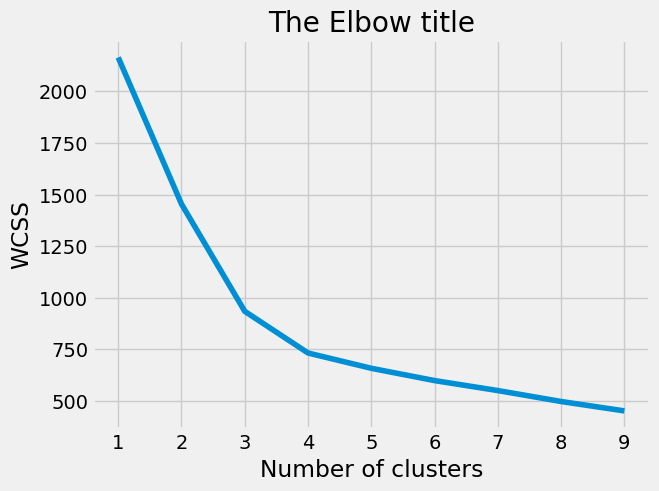

In [89]:
wcss=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(k_means_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

+ Parece que lo más sensato y lo que nos está pidiendo el cuerpo es agrupar los datos en 4 grupos (k=4).

In [572]:
# K = 4
kmeans = KMeans(n_clusters = 4, n_init = 10)

# Resultados del agrupamiento
identified_clusters = kmeans.fit_predict(k_means_data)
identified_clusters

array([3, 3, 0, ..., 0, 0, 0], dtype=int32)

In [573]:
k_means_data.columns

Index(['Altitud', 'TempMed', 'Precip', 'DirViento', 'VelMedViento',
       'RachaViento', 'TiempoSol', 'PresionMax', 'PresionMin'],
      dtype='object')

In [574]:
# Jugando con los centroides para extraer insights
s = kmeans.cluster_centers_
s

array([[0.05294592, 0.68623933, 0.00286116, 0.15863546, 0.20740536,
        0.25783415, 0.73171906, 0.84547574, 0.83646928],
       [0.64762151, 0.56075561, 0.0114992 , 0.22625743, 0.1348512 ,
        0.25206619, 0.62917642, 0.37540558, 0.3616803 ],
       [0.0541671 , 0.65982319, 0.00280798, 0.99815083, 0.23826521,
        0.2535708 , 0.62680885, 0.84765509, 0.83832285],
       [0.10503851, 0.49343863, 0.03789658, 0.18964274, 0.19265644,
        0.29662254, 0.23252391, 0.8064319 , 0.78751883]])

In [575]:
t = scaler.inverse_transform(s)
t

array([[6.17229926e+01, 2.33614963e+01, 3.92550790e-01, 1.65462754e+01,
        3.91996130e+00, 1.01670751e+01, 1.08294421e+01, 1.01122512e+03,
        1.00758733e+03],
       [7.32517060e+02, 1.89068241e+01, 1.57769029e+00, 2.31732283e+01,
        2.54868766e+00, 9.98884514e+00, 9.31181102e+00, 9.37988189e+02,
        9.33805118e+02],
       [6.31004942e+01, 2.24237232e+01, 3.85255354e-01, 9.88187809e+01,
        4.50321252e+00, 1.00353377e+01, 9.27677100e+00, 1.01156466e+03,
        1.00787537e+03],
       [1.20483444e+02, 1.65170714e+01, 5.19941133e+00, 1.95849890e+01,
        3.64120677e+00, 1.13656365e+01, 3.44135394e+00, 1.00514209e+03,
        9.99980427e+02]])

In [576]:
t[0][0]

61.72299258303778

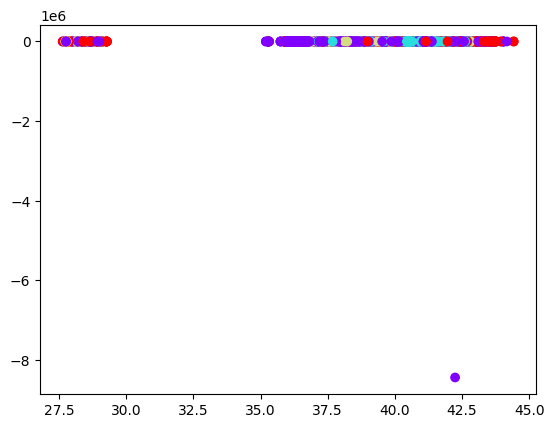

In [577]:
datos_ahogamientos_descategorizados_filter["cluster"] = identified_clusters
plt.scatter(datos_ahogamientos_descategorizados_filter["Latitud"], datos_ahogamientos_descategorizados_filter["Longitud"], c = datos_ahogamientos_descategorizados_filter['cluster'], cmap = "rainbow")

In [578]:
# Me cargo la observacion que es un outlier su latitud
s = datos_ahogamientos_descategorizados_filter["Longitud"].idxmin()
datos_ahogamientos_descategorizados_filter = datos_ahogamientos_descategorizados_filter.drop(s)

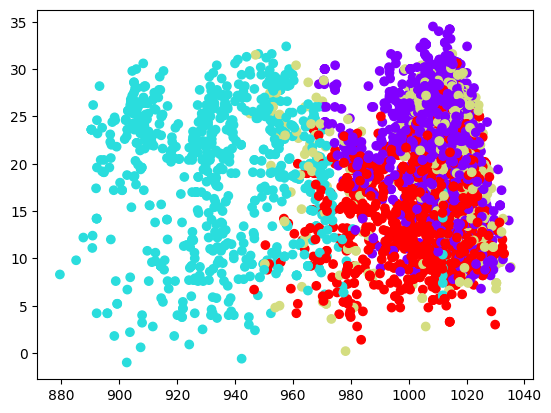

In [579]:
plt.scatter(datos_ahogamientos_descategorizados_filter["PresionMax"], datos_ahogamientos_descategorizados_filter["TempMed"], c = datos_ahogamientos_descategorizados_filter['cluster'], cmap = "rainbow")

In [580]:
import plotly.express as px

# Datos de ejemplo
x = datos_ahogamientos_descategorizados_filter["PresionMax"]
y = datos_ahogamientos_descategorizados_filter["TempMed"]
z = datos_ahogamientos_descategorizados_filter["Precip"]
color = datos_ahogamientos_descategorizados_filter['cluster']

# Crear el gráfico 3D
fig = px.scatter_3d(x=x, y=y, z=z, color = color, color_continuous_scale='Viridis')

# Personalizar el gráfico
fig.update_layout(title='Gráfico 3D de dispersión',
                  scene=dict(xaxis_title='Eje X',
                             yaxis_title='Eje Y',
                             zaxis_title='Eje Z'))


# Mostrar el gráfico
fig.show()

## K-MEANS 2

In [143]:
# Librerias
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [144]:
k_means_data.head()

,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,PresionMax,PresionMin
2,251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,977.5,968.1
3,251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,977.5,968.1
5,24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,1011.0,1008.5
6,24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,1011.0,1008.5
7,32,19.2,0.0,17.4,20.9,2.0,1.4,4.7,1011.8,1008.0


In [145]:
# Scalado de los datos
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(k_means_data)

In [146]:
# Mostramos los 5 observaciones
scaled_features[:5]

array([[0.22074468, 0.18028169, 0.26676385, 0.29446064, 0.14965986,
        0.25510204, 0.47089947, 0.51456311, 0.62901155, 0.58236808],
       [0.22074468, 0.18028169, 0.26676385, 0.29446064, 0.14965986,
        0.25510204, 0.47089947, 0.51456311, 0.62901155, 0.58236808],
       [0.01950355, 0.58028169, 0.        , 0.62682216, 0.53514739,
        0.02040816, 0.20634921, 0.21682848, 0.84403081, 0.84234234],
       [0.01950355, 0.58028169, 0.        , 0.62682216, 0.53514739,
        0.02040816, 0.20634921, 0.21682848, 0.84403081, 0.84234234],
       [0.02659574, 0.56901408, 0.        , 0.6909621 , 0.46485261,
        0.01020408, 0.07407407, 0.08090615, 0.8491656 , 0.83912484]])

In [147]:
# Instanciamos la clase con los parametros
kmeans = KMeans(

    init = 'random',
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = 42

)

# Ajustamos el modelo a los datos
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [148]:
# La estadística con el valor SSEE más pequeño
kmeans.inertia_

# Localización final de los centroides
kmeans.cluster_centers_

# Número de iteraciones requeridas para converger
kmeans.n_iter_

# Las asignaciones de clústeres se almacenan en una array
kmeans.labels_

array([2, 2, 0, ..., 0, 0, 0], dtype=int32)

+ **MÉTODO DEL CODO**

In [149]:
# Elegir el número apropiado de clusteres
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

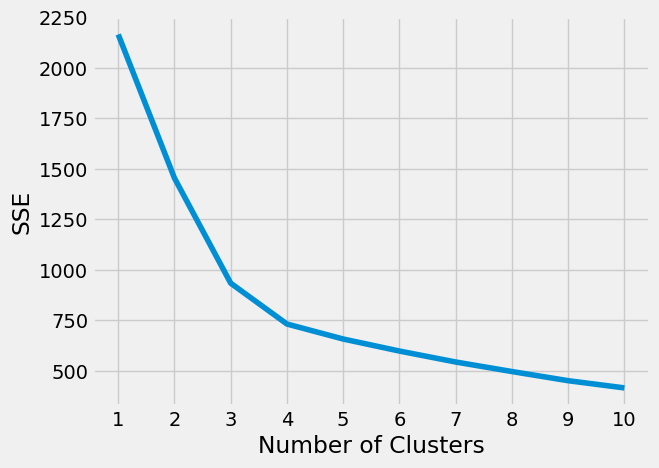

In [150]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

+ **COEFICIENTE DE LA SILUETA**

In [151]:
# Determinar el pinto de codo 
kl = KneeLocator(
    range(1,11), sse, curve = "convex", direction = 'decreasing'
)

kl.elbow

4

In [152]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# 2 clusters como mínimo o generará una excepción
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

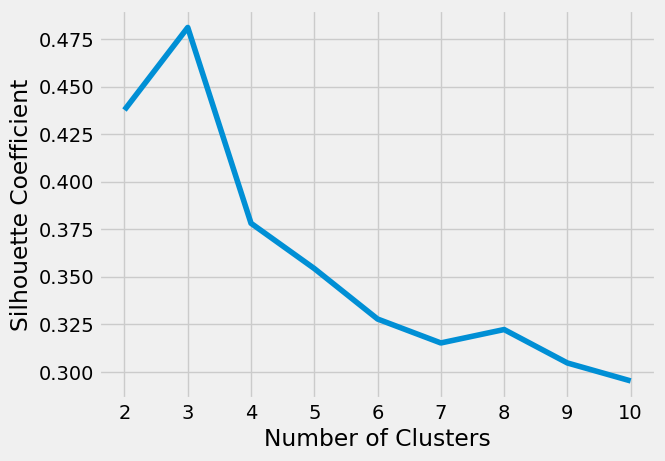

In [153]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## EVALUACIÓN DE K-MEANS y DBSCAN

In [154]:
k_means_data.head()

,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,PresionMax,PresionMin
2,251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,977.5,968.1
3,251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,977.5,968.1
5,24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,1011.0,1008.5
6,24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,1011.0,1008.5
7,32,19.2,0.0,17.4,20.9,2.0,1.4,4.7,1011.8,1008.0


In [155]:
# Instantiate k-means and dbscan algorithms
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

/Users/adrianova/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [156]:
print(kmeans_silhouette)
print(dbscan_silhouette)

0.44
0.36


## HIREARCHICAL CLUSTERING

In [163]:
# Cargamos los datos con variables categorizadas
datos_ahogamientos_descategorizados = pd.read_csv("datos-ahogamiento-meteorologicos_descategorizados.csv")
datos_ahogamientos_descategorizados.head(2)

,Fecha,IdAhogado,IdPersona,Localidad,Provincia,CCAA,Hora,Latitud,Longitud,Sexo,...,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
0,30-12-2020,7432,8532,Torredembarra,Tarragona,Cataluña,NaN,41.130523,1.395311,Sin datos,...,10.0,0.0,8.0,12.1,30.0,4.4,22.8,3.9,1010.0,1000.9
1,29-12-2020,7431,8531,"Cádiz, Playa de Santa Maria del Mar",Cádiz,Andalucía,17:48,36.519991,-6.287258,Sin datos,...,12.2,0.2,9.2,15.3,32.0,3.3,9.4,NaN,1017.0,1011.4


In [164]:
# Seleccionamos solo aquellas variables de interés y nos deshacemos del resto
drop_columns = ["IdAhogado", "IdPersona", "Localidad", "Riesgo", "Provincia", "CCAA", "Origen", \
           "Titular", "Causa", "Factor", "Enlace1", "Indicador", "Estacion"]
datos_ahogamientos_descategorizados_filter = datos_ahogamientos_descategorizados.drop(drop_columns, axis = 1)
datos_ahogamientos_descategorizados_filter.head()

,Fecha,Hora,Latitud,Longitud,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Intervencion,...,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
0,30-12-2020,NaN,41.130523,1.395311,Sin datos,NaN,1,1,3,4,...,10.0,0.0,8.0,12.1,30.0,4.4,22.8,3.9,1010.0,1000.9
1,29-12-2020,17:48,36.519991,-6.287258,Sin datos,NaN,1,3,3,4,...,12.2,0.2,9.2,15.3,32.0,3.3,9.4,NaN,1017.0,1011.4
2,29-12-2020,02:30,43.317215,-1.977996,1,47.0,1,1,4,4,...,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
3,29-12-2020,02:30,43.317215,-1.977996,1,33.0,1,4,1,4,...,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
4,28-12-2020,07:30,29.225448,-13.502007,1,NaN,1,1,1,5,...,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5


- **DEPURACIÓN BASE DE DATOS**

    + Tenemos 1.436 datos sin valor para la variable Hora. Como vimos en el apartado del análisis exploratorio de datos, pudimos comprobar como la frecuencia de los ahogamientos suele ser en horarios muy parecidos, de modo que podriamos aplicar una imputación de missings con la frecuencia más repetida. Para ello convertiremos la variable Hora a "datetime" y le aplicaremos las 17:00h, que es la hora que se repite con más frecuencia, incluso analizando los datos por grupos de edad.
    ---
    + Para la variable Edad tenemos 1.579 valores faltantes, de los cuáles no quiero realizar imputación de missings ya que estaríamos alterando la realidad de la información ya que es un dato que como hemos visto en la distribución por grupos de edad se distribuye uniformemente, mientras que si aplicamos la media o mediana habría un desbalanceo sobre un grupo de edad. Por este motivo, procedemos a eliminarla y trabjar con menos datos. 
    ---
    + Las variables meteorologicas tienen ciertos valores faltantes, para ello me voy a basar en la imputación de missings a través de la mediana, ya que la media sería poco representativa debido a que hay valores extremos y con una desviación estándard muy alta para la gran mayoría de los datos.
    ---
    + Para aquellas variables que que tienen observaciones "Sin datos" realizaremos imputación de missings con el valor más frecuente. Al ser pocas observaciones no tendrá una repercusión en el cómputo general de los datos.


In [165]:
# Frecuencia de la hora que más se repite 17:00h
datos_ahogamientos_descategorizados_filter["Hora"].describe()

count      6579
unique      734
top       17:00
freq        333
Name: Hora, dtype: object

In [166]:
# Convertir la variable "Hora" a datetime y extraer solo la hora
datos_ahogamientos_descategorizados_filter["Hora"] = pd.to_datetime(datos_ahogamientos_descategorizados_filter["Hora"]).dt.time

# Almacenamos la hora deseada
hour_imputation = pd.to_datetime("17:00").time()

# Imputar la hora en la variable "Hora" de la base de datos
datos_ahogamientos_descategorizados_filter["Hora"] = datos_ahogamientos_descategorizados_filter["Hora"].fillna(hour_imputation)

In [167]:
# Eliminamos los datos para la variable Edad
datos_ahogamientos_descategorizados_filter = datos_ahogamientos_descategorizados_filter.dropna(subset = ["Edad"])

In [168]:
# Realizamos imputación de missings sobre las variables meteorologicas
median_imputation = ["TempMed", "Precip", "TempMin", "TempMax", "DirViento",\
"VelMedViento", "RachaViento","TiempoSol", "PresionMax", "PresionMin"]

# Calculo de la mediana de cada variable
medians = datos_ahogamientos_descategorizados_filter[median_imputation].median()

for median in median_imputation:
    datos_ahogamientos_descategorizados_filter[median] = datos_ahogamientos_descategorizados_filter[median].fillna(medians[median])

In [169]:
# Convertimos la variables con datos "Sin datos" a numéricas
no_data_columns = ["Latitud", "Longitud", "Sexo", "Nacionalidad","Extraccion", "TipoAhogamiento", "Intervencion", "Pronostico", "Localizacion", "Reanimacion", "Vigilancia", "Actividad", "Deteccion"]

for var in no_data_columns:
    datos_ahogamientos_descategorizados_filter[var] = pd.to_numeric(datos_ahogamientos_descategorizados_filter[var], errors = "coerce")

In [170]:
# Imputación de missings con el valor más frecuente
no_data_columns = ["Sexo", "Nacionalidad", "Extraccion", "TipoAhogamiento", "Intervencion", "Pronostico", "Localizacion", "Reanimacion", "Vigilancia", "Actividad", "Deteccion"]

# Imprimir el número de datos con valor "Sin datos" por cada variable
for var in no_data_columns:
    count = datos_ahogamientos_descategorizados_filter[var].isna().sum()
    print(f'Número de datos con valor "Sin datos" en {var}: {count}')
      
for var in no_data_columns:
    moda = datos_ahogamientos_descategorizados_filter[var].mode().iloc[0]
    datos_ahogamientos_descategorizados_filter[var] = datos_ahogamientos_descategorizados_filter[var].fillna(moda)

Número de datos con valor "Sin datos" en Sexo: 52
Número de datos con valor "Sin datos" en Nacionalidad: 0
Número de datos con valor "Sin datos" en Extraccion: 87
Número de datos con valor "Sin datos" en TipoAhogamiento: 16
Número de datos con valor "Sin datos" en Intervencion: 64
Número de datos con valor "Sin datos" en Pronostico: 14
Número de datos con valor "Sin datos" en Localizacion: 0
Número de datos con valor "Sin datos" en Reanimacion: 156
Número de datos con valor "Sin datos" en Vigilancia: 23
Número de datos con valor "Sin datos" en Actividad: 258
Número de datos con valor "Sin datos" en Deteccion: 104


In [171]:
# Convertimos variable Fecha y variable Hora al tipo de dato correcto
datos_ahogamientos_descategorizados_filter["Fecha"] = pd.to_datetime(datos_ahogamientos_descategorizados_filter["Fecha"])
datos_ahogamientos_descategorizados_filter["Hora"] = pd.to_datetime(datos_ahogamientos_descategorizados_filter["Hora"], format = '%H:%M:%S').dt.time

/var/folders/f4/f_hhbl4s7hb5ldn8l8lf6kzr0000gn/T/ipykernel_5868/2108925762.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datos_ahogamientos_descategorizados_filter["Fecha"] = pd.to_datetime(datos_ahogamientos_descategorizados_filter["Fecha"])


In [172]:
datos_ahogamientos_descategorizados_filter.head()

,Fecha,Hora,Latitud,Longitud,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Intervencion,...,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
2,2020-12-29,02:30:00,43.317215,-1.977996,1.0,47.0,1,1.0,4.0,4.0,...,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
3,2020-12-29,02:30:00,43.317215,-1.977996,1.0,33.0,1,4.0,1.0,4.0,...,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
5,2020-12-28,13:09:00,28.485031,-14.094721,1.0,63.0,0,1.0,4.0,2.0,...,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5
6,2020-12-28,13:09:00,28.485031,-14.094721,1.0,53.0,0,1.0,1.0,2.0,...,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5
7,2020-12-28,14:52:00,28.396314,-16.651826,1.0,32.0,0,1.0,4.0,2.0,...,19.2,0.0,17.4,20.9,2.0,1.4,4.7,6.5,1011.8,1008.0


In [173]:
# Seleccionamos los datos que van a intervenir en el modelo de Clustering
data = datos_ahogamientos_descategorizados_filter.drop(["Fecha", "Hora", "Latitud", "Longitud", "Sexo", "Edad", \
                                                        "Nacionalidad", "Extraccion", "TipoAhogamiento", "Intervencion", \
                                                        "Pronostico", "Localizacion", "Reanimacion", "Vigilancia", \
                                                        "Actividad", "Deteccion"], axis = 1)

In [174]:
# Normalización de los datos
normalization_variables = ['Altitud', 'TempMed', 'Precip', 'TempMin', 'TempMax', 'DirViento', 'VelMedViento', \
                           'RachaViento', 'TiempoSol', 'PresionMax', 'PresionMin']

# Instancia de scalar los datos
scaler = MinMaxScaler()

# Aplicación de la normalización sonre las variables
data[normalization_variables] = scaler.fit_transform(data[normalization_variables])

In [175]:
data.head()

,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
2,0.220745,0.180282,0.266764,0.294461,0.149660,0.255102,0.470899,0.514563,0.000000,0.629012,0.582368
3,0.220745,0.180282,0.266764,0.294461,0.149660,0.255102,0.470899,0.514563,0.000000,0.629012,0.582368
5,0.019504,0.580282,0.000000,0.626822,0.535147,0.020408,0.206349,0.216828,0.614865,0.844031,0.842342
6,0.019504,0.580282,0.000000,0.626822,0.535147,0.020408,0.206349,0.216828,0.614865,0.844031,0.842342
7,0.026596,0.569014,0.000000,0.690962,0.464853,0.010204,0.074074,0.080906,0.439189,0.849166,0.839125


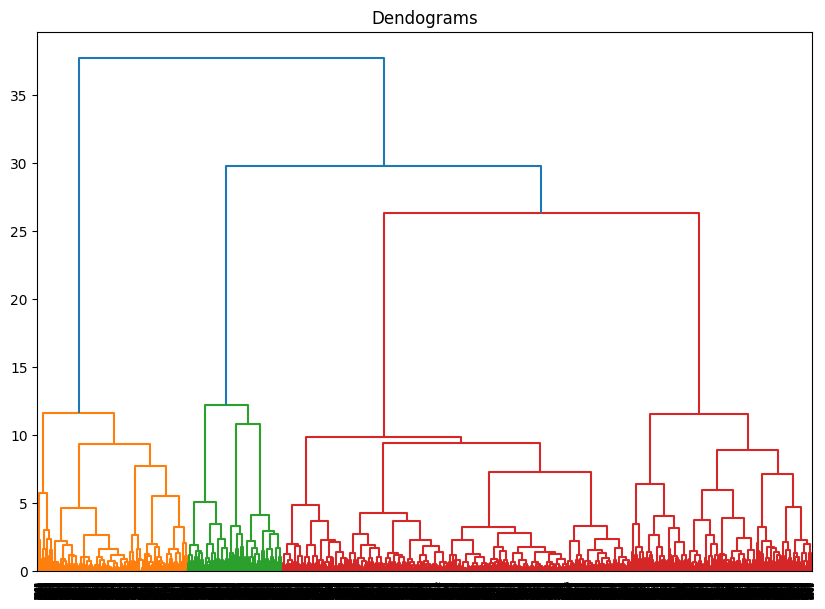

In [176]:
# Dibujamos el dendograma para decidir el número de grupos
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = hc.dendrogram(hc.linkage(data, method = 'ward'))

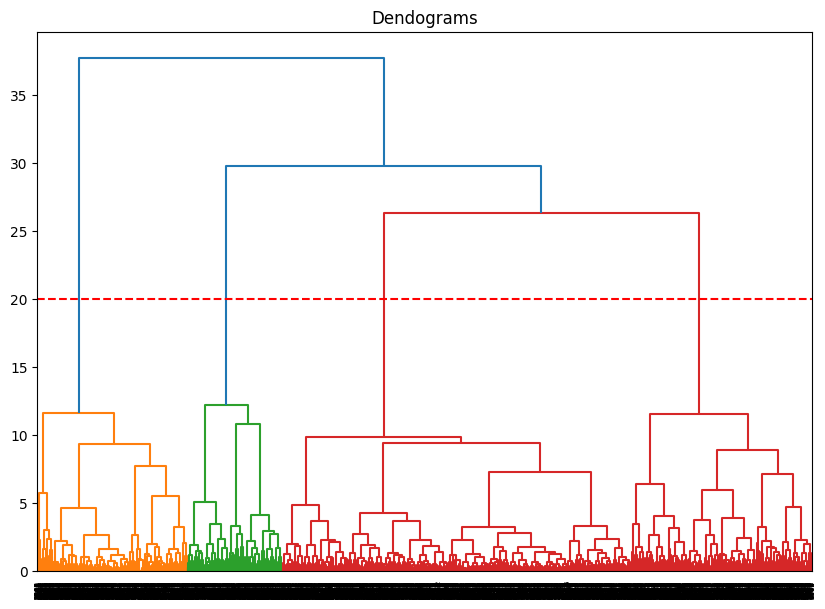

In [177]:
# La línea vertical con distancia máxima es la línea azul y roja, por lo que podemos decidir un umbral de 20
# Dibujamos el dendograma para decidir el número de grupos
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = hc.dendrogram(hc.linkage(data, method = 'ward'))
plt.axhline(y = 20, color = 'red', linestyle = '--')

In [186]:
# Tenemos 4 grupos, aplicamos el agrupamiento jerárquico para 3 clústers
cluster = AgglomerativeClustering(n_clusters = 4 , metric = 'euclidean', linkage = 'ward')
clusters = cluster.fit_predict(data)

In [187]:
# Añadimos el cluster a la base de datos
datos_ahogamientos_descategorizados_filter["cluster"] = clusters

In [188]:
datos_ahogamientos_descategorizados_filter.head()

,Fecha,Hora,Latitud,Longitud,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Intervencion,...,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin,cluster
2,2020-12-29,02:30:00,43.317215,-1.977996,1.0,47.0,1,1.0,4.0,4.0,...,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1,2
3,2020-12-29,02:30:00,43.317215,-1.977996,1.0,33.0,1,4.0,1.0,4.0,...,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1,2
5,2020-12-28,13:09:00,28.485031,-14.094721,1.0,63.0,0,1.0,4.0,2.0,...,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5,3
6,2020-12-28,13:09:00,28.485031,-14.094721,1.0,53.0,0,1.0,1.0,2.0,...,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5,3
7,2020-12-28,14:52:00,28.396314,-16.651826,1.0,32.0,0,1.0,4.0,2.0,...,0.0,17.4,20.9,2.0,1.4,4.7,6.5,1011.8,1008.0,3


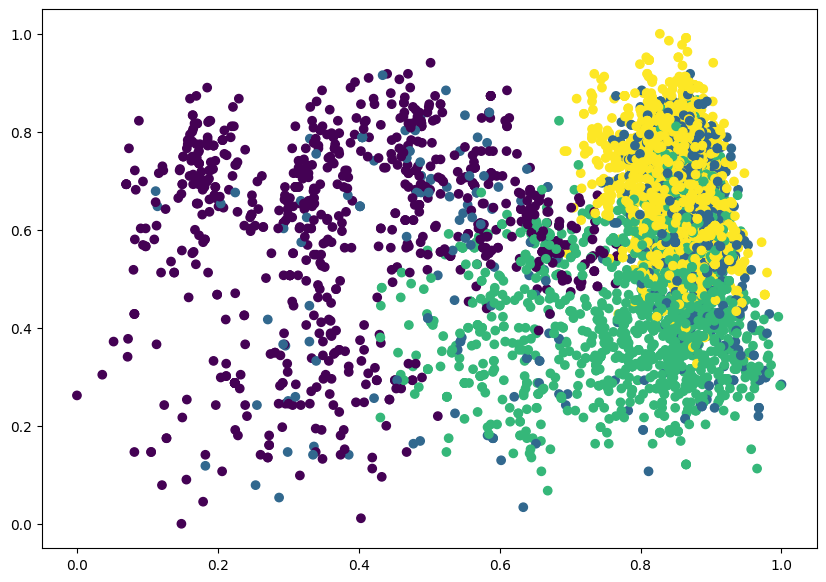

In [189]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['PresionMax'], data['TempMed'], c=cluster.labels_) 

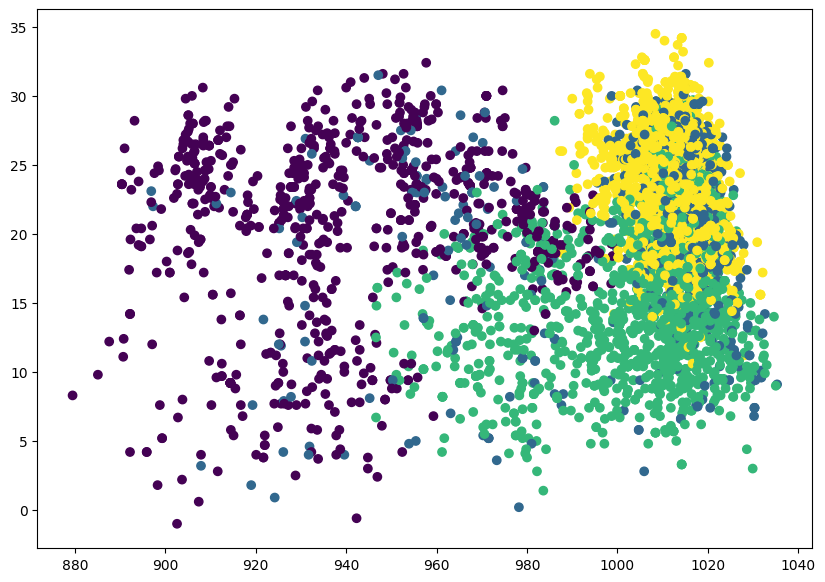

In [190]:
plt.figure(figsize=(10, 7))  
plt.scatter(datos_ahogamientos_descategorizados_filter['PresionMax'], datos_ahogamientos_descategorizados_filter['TempMed'], c=datos_ahogamientos_descategorizados_filter['cluster'])

In [191]:
# Explorar los grupos de datos asignados a cada cluster
for cluster_id in datos_ahogamientos_descategorizados_filter['cluster'].unique():
    cluster_data = datos_ahogamientos_descategorizados_filter[datos_ahogamientos_descategorizados_filter['cluster'] == cluster_id]
    print(f"Grupo de datos del Cluster {cluster_id}:")
    print(cluster_data.head(3))
    print()

Grupo de datos del Cluster 2:
       Fecha      Hora    Latitud  Longitud  Sexo  Edad  Nacionalidad  \
2 2020-12-29  02:30:00  43.317215 -1.977996   1.0  47.0             1   
3 2020-12-29  02:30:00  43.317215 -1.977996   1.0  33.0             1   
9 2020-12-25  09:00:00  37.396790 -6.476312   1.0  62.0             1   

   Extraccion  TipoAhogamiento  Intervencion  ...  Precip  TempMin  TempMax  \
2         1.0              4.0           4.0  ...    36.6      3.8      7.0   
3         4.0              1.0           4.0  ...    36.6      3.8      7.0   
9         1.0              1.0           2.0  ...     0.0      7.4     17.5   

   DirViento  VelMedViento  RachaViento  TiempoSol  PresionMax  PresionMin  \
2       26.0           8.9         18.1        0.0       977.5       968.1   
3       26.0           8.9         18.1        0.0       977.5       968.1   
9        9.0           3.3         10.0        7.6      1023.5      1018.1   

   cluster  
2        2  
3        2  
9       